# Tutorial 21: Random Numbers

## PHYS 2600, Spring 2019

In [2]:
# Import cell
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## T21.1 - Warming up with random numbers

### Part A

Using `np.random.randint()` _without setting the seed_, generate 10 random integers from the set `(0,1,2,3)`.  Then, set the seed to 1414, and generate another 10 random integers.

In [3]:
print(np.random.randint(0,5,size=10))
np.random.seed(1414)
print(np.random.randint(0,5,size=10))

[0 4 1 2 3 4 0 3 1 2]
[4 2 4 0 0 4 0 1 1 2]


Now compare your results with your neighbor:

- Did you get completely different results without the seed?
- What if you try to run the cell at the same time?  (Does this prove anything to you about how the computer's clock is used in choosing seeds?)
- Do your results match with the _same_ seed?
- Once you've used the seed, comment the seed line out - _now_ how do your results compare to your neighbors?  (If you want to go back to a randomly determined seed, restart the kernel or call `np.random.seed()` with no argument.)

__Some notes on the above bullet points:__

* __You should get different results (every time you run) if you don't set the seed; the seed is set automatically by the computer if you don't specify it.__
* __The computer clock is often used as part of the seeding algorithm, in fact - but when it is, the time will be used up to the millisecond or even more precisely, and human reflexes aren't good enough to match that!  So this test doesn't prove much either way.__
* __Your results should match with the same seed, as long as you and your neighbor are using the same pseudo-RNG - guaranteed in this case since we're all using the same server.__
* __Once you've fixed the seed, the entire chain of PRNG results going forward is determined - a PRNG is deterministic!  So your results will match forever, unless you choose different seeds.__

### Part B

__Generate 50 random angles__ $\theta$ between 0 and $2\pi$: use `np.random()` to generate uniformly distributed numbers in $(0,1)$, and then multiply the array by the appropriate constant to rescale your random numbers to the interval you want.

Then, __plot the resulting polar-coordinate points $(\cos \theta, \sin \theta)$__ using `plt.scatter`.  (By default, the plot will be squashed: if you want a square aspect ratio so a circle will look right, use `plt.figure(figsize=(6,6))` to get a 6"x6" square plot.)

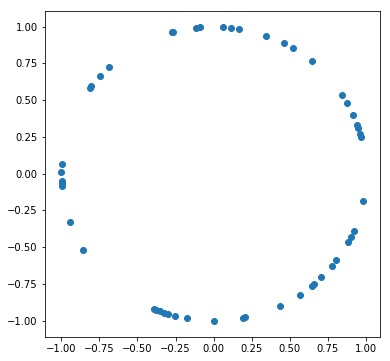

In [4]:
theta = np.random.rand(50) * 2 * np.pi
plt.figure(figsize=(6,6))
plt.scatter(np.cos(theta), np.sin(theta))

### Part C

__Generate 10,000 random points $(x,y)$__, in the range (0,10) for both $x$ and $y$.  _Don't use a for loop_ - use the fact that `np.random.rand()` accepts the shape of an array, and create an array of random numbers with 2 rows and 10,000 columns.

Finally, __plot the distribution of points with `plt.scatter`__.  (If you made your array with 2 rows, then the first row containing `x` can be accessed with the slice `[0,:]`, and similarly for `y`.)  Does this look like a _uniform_ distribution over the plane?

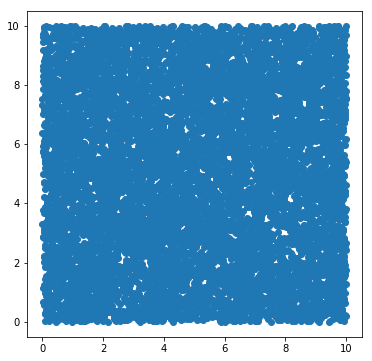

In [5]:
R2 = np.random.rand(2,10000)*10
plt.figure(figsize=(6,6))
plt.scatter(R2[0,:], R2[1,:])

### Part D

For any application of random numbers, it's crucial that we are using the correct __probability distribution__ for whatever calculation or simulation we are trying to do.  The uniform distribution (all values equally probable) is often suitable, but many other situations are better described by a __normal distribution__:

<img src="https://physicscourses.colorado.edu/phys2600/phys2600_sp19/img/gaussian-sigma.png" width=400px />

Here, we have a 68% chance of drawing a random number within one standard deviation ($1\sigma$) of the mean value $\mu$, and decreasing odds for numbers further from $\mu$.

To draw from a normal distribution, we can use the `np.random.normal()` function.  In the cell below, __generate 300 points from a normal distribution with mean $\mu = 2$ and standard deviation $\sigma = 2$.__  (Read the documentation to see how to set $\mu$ and $\sigma$.)  

__Save your random numbers to the variable `R_normal`__; the code provided in the next cell will then make a scatter plot of those points along the x-axis.

In [6]:
R_normal = np.random.normal(loc=2, scale=2, size=300)

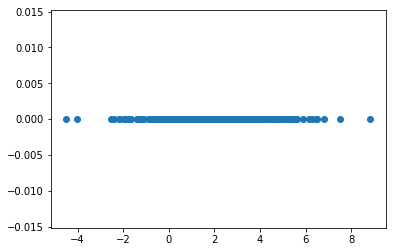

In [7]:
assert R_normal.shape == (300,)

plt.scatter(R_normal, np.zeros_like(R_normal))

From the one-dimensional plot above, you should roughly see the characteristics of a normal distribution: most of the points are concentrated close to the mean $\mu = 2$, and they become very sparse once we get 1-2 standard deviations away from $\mu$.  However, it's hard to really see the details of the underlying probability with this plot.  A __histogram__ is a better option!

To make a histogram, we specify a set of __bins__, finite sub-intervals over the interval for which our data exists.  Then, we produce a set of __counts__ by counting how many data points are in each bin.  The relative number of data points in a bin reflect the probability density averaged over that bin.

The plotting function `plt.hist()` automatically produces bins and counts from a 1-d array, and then plots the resulting histogram.  The simplest way to choose the bins is with the argument `bins=n`, where `n` is an integer number of bins.  __Make a histogram of `R_normal` with 7 bins__ in the cell below.

__Note:__ as we discussed in lecture, `plt.hist` does more than just making a plot - it also returns NumPy arrays containing the counts and the bin edges, as we saw in lecture.  Compare these arrays that are printed out to the plot!

(array([  2.,  25.,  80., 119.,  57.,  15.,   2.]),
 array([-4.48451333, -2.58033995, -0.67616657,  1.22800681,  3.13218019,
         5.03635357,  6.94052695,  8.84470033]),
 <a list of 7 Patch objects>)

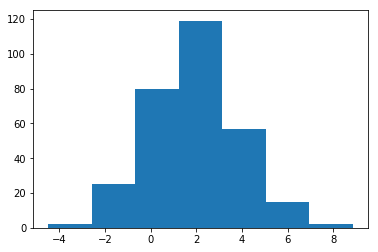

In [8]:
plt.hist(R_normal, bins=7)

This has a much closer resemblance to the normal distribution probability density, although it's not quite right!  __Try changing the number of bins to be higher__: you'll see more and more fluctuations in the values away from a smooth, normal distribution.  

This is an example of __sampling error__: although we're drawing from a perfect normal distribution, in a finite number of samples we will have some random fluctuations away from the expected shape.  We'll discuss sampling error more next time.

## T21.2 - Rolling the dice

### Part A

We can get new distributions that _aren't_ uniform by combining or taking functions of uniform random numbers.  A simple example comes from rolling pairs of six-sided dice, and looking at the distribution of the _sum_:

<a href="https://math.stackexchange.com/questions/1204396/why-is-the-sum-of-the-rolls-of-two-dices-a-binomial-distribution-what-is-define" target="_blank"><img src="https://physicscourses.colorado.edu/phys2600/phys2600_sp19/img/dice_histogram.png" width=400px /></a>

We end up with a triangular-shaped distribution, even though the probability of rolling any individual number from 1-6 on a single die is uniform.  This is simple combinatorics: there are many ways to make 7 by adding two dice, but only one way to make 2 or 12.  The distribution should be peaked at 7 and symmetric on both sides.  

Let's reproduce this result in Python.  Using `np.random.randint()`, __create an array called `rolls`__ containing 10,000 random pairs of integers between 1 and 6 (inclusive.)  Then use `np.sum` to __create an array called `sums`__ which contains the sum of each pair of integers.  (The `sums` array will give us the distribution of fair rolls for a pair of six-sided dice.) 

_(Hint: `rolls` should have 2 rows and 10,000 columns, which you can get directly from `np.random.randint` with the `size=...` keyword.  To create sums, you'll need the `axis=...` keyword, since just calling `np.sum(rolls)` will add everything up and leave you with one number!)_



In [9]:
rolls = np.random.randint(1,7,size=(2,10000))
sums = np.sum(rolls, axis=0)

In [10]:
assert rolls.shape == (2,10000)
assert sums.shape == (10000,)

Now we'd like to plot the distribution of `sums`. Our first instinct is probably to use `plt.hist()`, but it turns out that you have to be a little careful with how the histogram bins work, since our dice rolls are all exactly integers.  So, I'm going to ask you to do the same plot _two ways:_

1. __Use the function `np.unique()` with argument `return_counts=True`__: this will return a tuple of 2 arrays - the first is the unique values in `sums` (which is every number from 2 to 12) and the second is the number of counts of each value.  You can plug these two arrays into `plt.plot` - I suggest using a marker like `marker='s'` so you can see the discrete points being plotted.

2. __Use `plt.hist` on `sums` directly__, but make sure you pick the right number of bins (specified by the `bins=...` argument.)  You should have the same number of bins as possible outcomes!

Plot these both in the same cell: they should agree with each other, but common mistakes with `plt.hist` will show up plainly if it disagrees with the `np.unique()` approach.


(array([ 261.,  544.,  833., 1132., 1401., 1707., 1360., 1092.,  860.,
         533.,  277.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <a list of 11 Patch objects>)

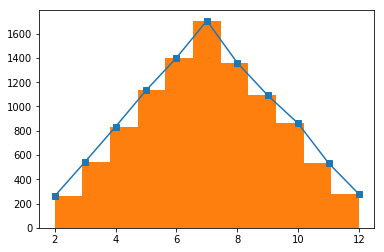

In [11]:
unique_sums, counts = np.unique(sums, return_counts=True)
plt.plot(unique_sums, counts, marker='s')

plt.hist(sums, bins=11)

### Part B

A common task with random numbers is __random sampling__, where we have some list of values and we want to choose sets of them randomly.  We could use `randint` to index the list, but this problem is so common that NumPy gives us a function to do it, `np.random.choice()`.

Create a list of possible outcomes for rolling one die, and then __use `np.random.choice` with the `size=` keyword argument__ to repeat what you did in part A, i.e. drawing 10,000 random rolls of a pair of dice and then creating the array of their sums.  __Copy/paste one of your plotting routines from above__ to visualize the result and make sure you're getting the same distribution.

(array([ 286.,  531.,  842., 1100., 1415., 1619., 1403., 1113.,  859.,
         540.,  292.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <a list of 11 Patch objects>)

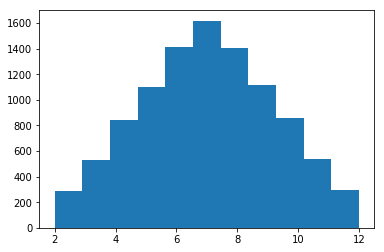

In [12]:
die_list = [1,2,3,4,5,6]

rolls = np.random.choice(die_list, size=(2,10000))
sums = np.sum(rolls, axis=0)
plt.hist(sums, bins=11)

## T21.3 - The random walk

In physics, _statistical mechanics_ starts from the kinematics of individual molecules and allows us to make predictions about the aggregate behavior of something like a gas.  

Similarly, we can use a computer to simulate the motion of individual gas particles and try to study the properties of gases in aggregate.  However, solving using Newton's laws is not that easy here, especially since we would have to deal with collisions and with other forces between molecules to get a realistic model.  

Instead, a quick and dirty model of a gas can be obtained using a __random walk__, in which each particle moves around independently and randomly.  As long as the number of molecules is large enough, the random walk can capture all of the microscopic physics of molecules kicking each other around. 

([Here's a simulation of simple motion and collisions](https://www.youtube.com/watch?v=1jYabtziQZo) - you can see that the behavior of the highlighted particle resembles random motion, even with a pretty small number of particles.)

### Part A

__Implement the function `step_random_walk_2d(x_coords, y_coords)` below__, which should take two arrays of equal length containing the x- and y-coordinates for some number of particles.  We'll use a very simple random walk algorithm:

- For each particle, choose a random angle $\phi$ between 0 and $2\pi$.
- The particle moves by 1 unit of distance in the direction given by $\phi$, i.e. it is displaced by $(\Delta x, \Delta y) = (\cos \phi, \sin \phi)$.

We'll do this in a _vectorized_ approach: we draw all the angles at once in a single array, and then calculate and apply the displacements using NumPy functions.  Your function should _update the coordinates in-place_, which means it shouldn't return anything!

In [13]:
def step_random_walk_2d(x_coords, y_coords):
    # Vectorized algorithm:
    
    # Draw an array of random angles phi, uniformly between 0 and 2*pi
    # You should draw one angle for every particle.
    # (Hint: go look at T21.1B again.)
    
    # Use numpy functions (no for loops!) to calculate the arrays
    # delta_x and delta_y, the displacements for each particle
    
    # Update x_coords and y_coords in place, i.e. overwrite
    # those variables with the displaced arrays
    
    ### BEGIN SOLUTION
    phi = np.random.rand(len(x_coords)) * 2 * np.pi
    x_coords += np.cos(phi)
    y_coords += np.sin(phi)
    ### END SOLUTION    
    
    
    # Return None (since we changed the arrays in-place)
    return None
    


Now in the cell below, __create an initial distribution of 100 particles at the origin $(0,0)$__, apply _one step_ of your function `step_random_walk_2d(x,y)` above, and then call `plt.scatter` to __plot the positions after one step.__  You should see them distributed around a circle, due to the algorithm that we chose.  

(This doesn't look very random, of course!  But you'll see that despite this structure on step 1, the behavior after many steps will look much less uniform.)

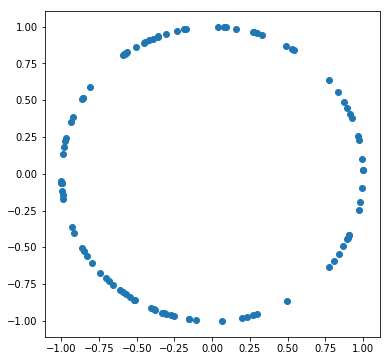

In [14]:
x, y = np.zeros(100), np.zeros(100)
step_random_walk_2d(x, y)

plt.figure(figsize=(6,6))
plt.scatter(x,y)

Now __use a for loop to take 50 steps__, and plot the distribution of particles again.  Now it should look pretty uniform!  Notice how the vertical and horizontal scale of the plot has changed, too.

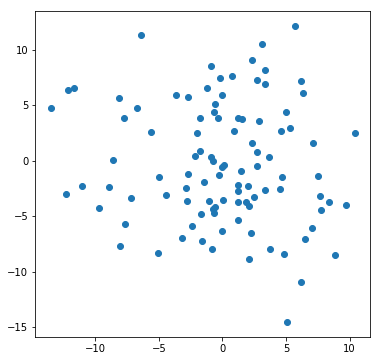

In [16]:
x, y = np.zeros(100), np.zeros(100)
for dummy in range(50):
    step_random_walk_2d(x, y)

plt.figure(figsize=(6,6))
plt.scatter(x,y)

Finally, __run the definition of `plot_random_walk_2d` and the cell afterwards__ to animate your random walk!  (This also gives you a demonstration of how to create animated plots in Jupyter - the details are a little complicated, which is why I'm just demoing this for you.)

In [17]:
import matplotlib.animation as animation
from IPython.display import HTML

def plot_random_walk_2d(Np, Ns, steps_per_plot=5):
    """
    Simulate a random walk in two dimensions.
    
    Arguments:
    =====
    * Np: number of particles to simulate.
    * Ns: number of steps to simulate.
    * steps_per_plot: how many steps to wait in between 
        plotting the positions of the particles (default: 10.)

    Returns:
    =====
    * fig, frames: plots of the particle positions, 
        formatted as needed to create an animated graph.

    """
    
    # Setup for animated plots
    fig, ax = plt.subplots(figsize=(8,8))
    frames = []
    
    # Initialize two arrays, x_coords and y_coords, of length Np
    x_coords = np.zeros(Np)
    y_coords = np.zeros(Np)
    
    for step in range(Ns):
        # If step is divisible by steps_per_plot, make a plot
        if step % steps_per_plot == 0:
            frame = ax.plot(x_coords, y_coords, linestyle=' ', marker='.', color='blue')
            frames.append(frame)        
        
        # Take a random step
        step_random_walk_2d(x_coords, y_coords)

    return fig, frames


In [18]:
fig, frames = plot_random_walk_2d(Np=100, Ns=400)
ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True, repeat=False)
plt.close(fig)  ## Stops Jupyter from showing the last frame alongside the animated plot

HTML(ani.to_jshtml())

This already exhibits the phenomenon of __diffusion__: the particles, which started tightly packed into a region of high density, are spreading out and becoming less dense over time.  In fact, we could do some statistical tests on the distribution vs. time to quantify this behavior in terms of a _diffusion coefficient_.  (But we'll need to learn about models and fitting to data before we can do that.)

### Part B (optional challenge)

If we really wanted to try something like studying the ideal gas law, it would be better to have our particles trapped in a finite volume.  A simple but physically-motivated modification to our algorithm we could make for a finite volume would be: if any particle would be displaced _outside_ the volume, it moves in the _opposite direction_ instead.

Can you rewrite `step_random_walk_2d` so that __all of the gas particles are trapped in the square region__ $-10 \leq x,y \leq 10$, using this simple algorithm?  Then try to re-run the definition of `plot_random_walk_2d` above and see how your plot looks now.

_(Hint: you want to create a mask array which is `True` for any particle that's outside the volume.  This is a combination of four masks which check the four boundaries of the square.  Use_ `np.logical_or()` _to combine multiple masks into one that's `True` if any of them is `True`.)_

In [19]:
def step_random_walk_2d(x_coords, y_coords):
    ### BEGIN SOLUTION
    phi = np.random.rand(len(x_coords)) * 2 * np.pi
    
    dx = np.cos(phi)
    dy = np.sin(phi)
    
    # Shift particles
    x_coords += dx
    y_coords += dy
    
    # Create a mask for anywhere the update would be outside the boundary
    x_mask = np.logical_or(x_coords < -10, x_coords > 10)
    y_mask = np.logical_or(y_coords < -10, y_coords > 10)
    
    oob_mask = np.logical_or(x_mask, y_mask)
    
    # Updates become negative where the mask applies
    x_coords[oob_mask] -= 2*dx[oob_mask]
    y_coords[oob_mask] -= 2*dy[oob_mask]
    ### END SOLUTION  
    
    
    return None
